In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_csv('MLCleanedData.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107634 entries, 0 to 107633
Data columns (total 89 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   107634 non-null  int64  
 1   Season       107634 non-null  int64  
 2   DayNum       107634 non-null  int64  
 3   WTeamID      107634 non-null  int64  
 4   WScore       107634 non-null  int64  
 5   LTeamID      107634 non-null  int64  
 6   LScore       107634 non-null  int64  
 7   WLoc         107634 non-null  object 
 8   NumOT        107634 non-null  int64  
 9   WFGM         107634 non-null  int64  
 10  WFGA         107634 non-null  int64  
 11  WFGM3        107634 non-null  int64  
 12  WFGA3        107634 non-null  int64  
 13  WFTM         107634 non-null  int64  
 14  WFTA         107634 non-null  int64  
 15  WOR          107634 non-null  int64  
 16  WDR          107634 non-null  int64  
 17  WAst         107634 non-null  int64  
 18  WTO          107634 non-

In [4]:
# Select the desired columns using column indexing
df_reduced = data.iloc[:, 9:35].copy()
#df_reduced

In [5]:
# Create an instance of PCA and specify the number of components to retain
pca = PCA(n_components=2)

# Fit the PCA model to data
pca.fit(df_reduced)

# Transform the data to the new reduced dimensions
data_reduced = pca.transform(df_reduced)
data_reduced

array([[ -3.36304152, -17.0227858 ],
       [-22.36878574, -14.38066872],
       [  2.19742741, -27.04954649],
       ...,
       [ 16.81537497, -22.06986263],
       [-18.18535654,   4.42466658],
       [  7.44320165,  -7.69592248]])

In [6]:
print(len(data_reduced))

107634


In [7]:
# Set the desired number of samples
num_samples = 10000

# Get the total number of entries in data
total_entries = data_reduced.shape[0]

# Generate random indices for sampling
random_indices = np.random.choice(total_entries, size=num_samples, replace=False)

# Select the subset of data based on the random indices
data_subset = data_reduced[random_indices, :]
print(len(data_subset))


10000


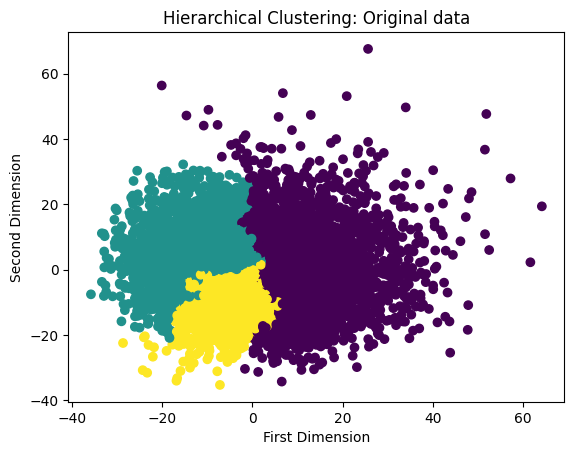

In [8]:
# Create an instance of the AgglomerativeClustering algorithm
clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as desired

# Fit the algorithm 
clusters = clustering.fit_predict(data_subset)

# Visualize the clusters using a scatter plot
plt.scatter(data_subset[:, 0], data_subset[:, 1], c=clusters)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Hierarchical Clustering: Original data')
plt.show()

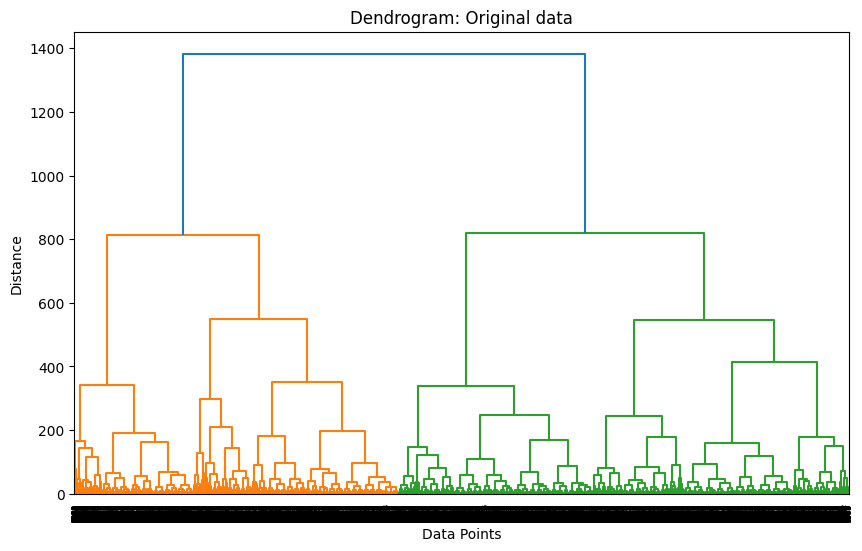

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering to obtain the linkage matrix
linkage_matrix = linkage(data_subset, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram: Original data')
plt.show()


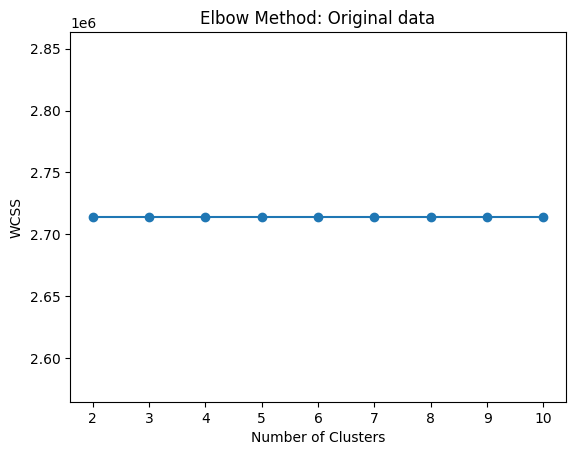

In [10]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(data_subset)
    wcss.append(np.sum((data_subset - np.mean(data_subset, axis=0))**2))

# Plot the WCSS values against the number of clusters
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method: Original data')
plt.show()


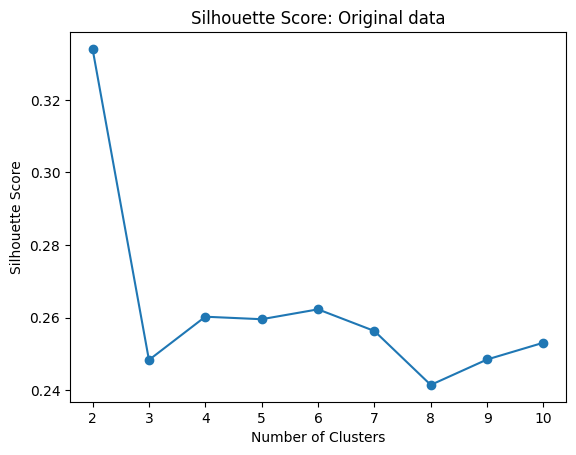

In [11]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(data_subset)
    silhouette_scores.append(silhouette_score(data_subset, clusters))

# Plot the silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score: Original data')
plt.show()

Using season avg data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Data Preprocessing
df = pd.read_csv("seasonStats.csv")
subset_df = df.sample(frac=0.2)  # Adjust the fraction as per your computational resources

# Select the features you want to use for clustering
selected_features = ["AVGFGM", "AVGFGA", "AVGFGM3", "AVGFGA3", "AVGFTM", "AVGFTA", "AVGOR", "AVGDR", "AVGAst", "AVGTO", "AVGStl", "AVGBlk", "AVGPF"]
X = subset_df[selected_features].values

# Scale or normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

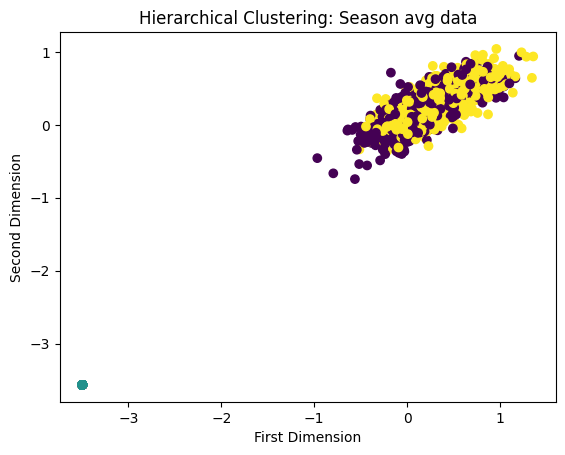

In [14]:
# Create an instance of the AgglomerativeClustering algorithm
clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as desired

# Fit the algorithm
clusters = clustering.fit_predict(X_scaled)

# Step 3: Visualize the clusters using a scatter plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Hierarchical Clustering: Season avg data')
plt.show()

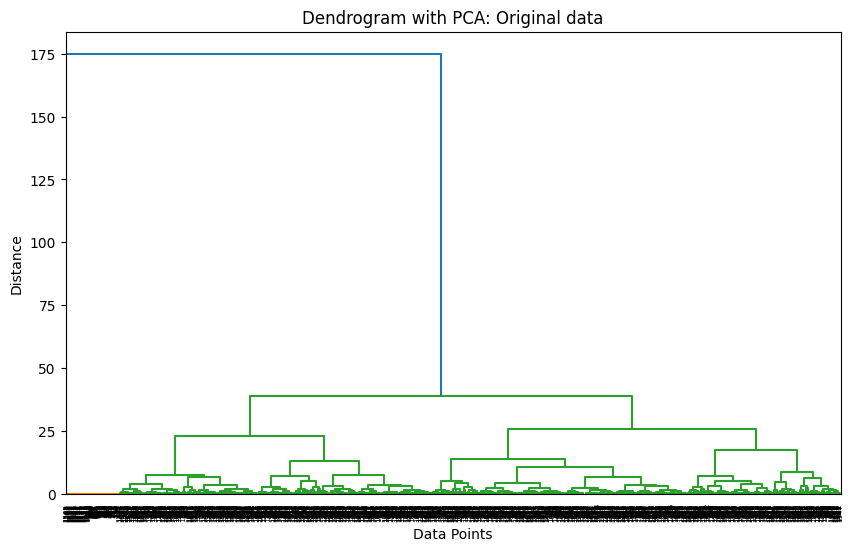

In [15]:
# Perform hierarchical clustering to obtain the linkage matrix
linkage_matrix = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram with PCA: Original data')
plt.show()

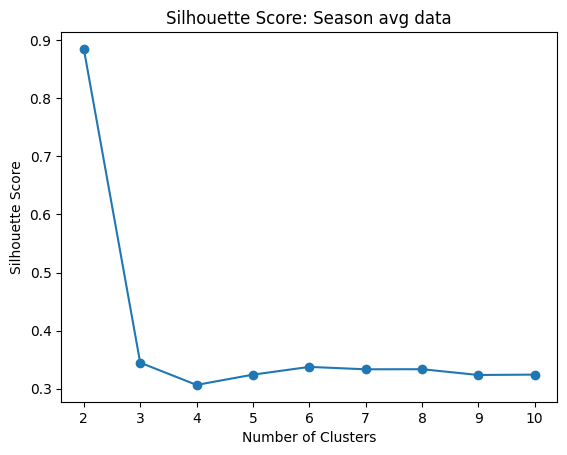

In [17]:
# Step 6: Calculate the silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, clusters))

# Step 7: Plot the silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score: Season avg data')
plt.show()